# Calculating Indices from landsat Demo

## Data description :
Landsat 8 l1c1 Satellite Imagery from https://earthexplorer.usgs.gov/

Operational Land Imager (OLI)  -  Built by Ball Aerospace & Technologies Corporation

Nine spectral bands, including a pan band:

Band 1 Visible (0.43 - 0.45 µm) 30 m 

Band 2 Visible (0.450 - 0.51 µm) 30 m

Band 3 Visible (0.53 - 0.59 µm) 30 m

Band 4 Red (0.64 - 0.67 µm) 30 m

Band 5 Near-Infrared (0.85 - 0.88 µm) 30 m

Band 6 SWIR 1(1.57 - 1.65 µm) 30 m

Band 7 SWIR 2 (2.11 - 2.29 µm) 30 m

Band 8 Panchromatic (PAN) (0.50 - 0.68 µm) 15 m

Band 9 Cirrus (1.36 - 1.38 µm) 30 m


.MTL file which includes metadata information necessary for the radiance, reflectance and brightness calculations


#### All the Radiometric corrections and caliberations have been performed using Landsat 8 handbook gievn bby USGS

https://www.usgs.gov/media/files/landsat-8-data-users-handbook

## Indices Description
### NDVI

The normalized difference vegetation index (NDVI) is a standardized index allowing you to generate an image displaying greenness, also known as relative biomass.

NDVI = ((NIR - Red)/(NIR + Red))
    
    
### NDMI

The Normalized Difference Moisture Index (NDMI) is sensitive to the moisture levels in vegetation. It is used to monitor droughts as well as monitor fuel levels in fire-prone areas.

NDMI = (NIR - SWIR1)/(NIR + SWIR1)

### NDBI

The Normalized Difference Built-up Index (NDBI) uses the NIR and SWIR bands to emphasize man-made built-up areas. It is ratio based to mitigate the effects of terrain illumination differences as well as atmospheric effects.

NDBI = (SWIR - NIR) / (SWIR + NIR)

### MNDWI

The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices.

MNDWI = (Green - SWIR) / (Green + SWIR)

### Albedo

Albedo is an important property of the Earth surface heat budget. A simple definition of albedo (a) is the average reflectance of the sun’s spectrum. This unitless quantity has values ranging from 0 to 1.0 and will vary based on the land cover. For example snow would have a high value and coniferous forests a low value.

### Land Surface Temperature

Land Surface integrated with Temperature (LST), the skin
temperature of the ground, is identified as a significant
variable of microclimate and radiation transfer within the
atmosphere.

https://ijret.org/volumes/2016v05/i01/IJRET20160501017.pdf#:~:text=Land%20surface%20temperature%20is%20the,surface%20emissivity%20and%20brightness%20values.

In [1]:
import landsat_usable as lu
import os
import matplotlib.pyplot as plt
REGION = 'delhi_test'
UTM = 32643
WGS84 = 4326
extent= 77.26551,28.632822,77.274914,28.647587
landsat_indices_obj = lu.calc_landsat_indices(REGION, UTM, WGS84, extent)
landsat_indices_obj.mainfunction_landsat_calculation()

Check the output foder


In [2]:
region_box , bbox = landsat_indices_obj.tuple_to_geojson(extent)

In [3]:
region_box

,geometry
0,"POLYGON ((722386.804 3169422.863, 722355.645 3..."


In [4]:
bbox

(77.26551, 28.632822, 77.274914, 28.647587)

<AxesSubplot:>

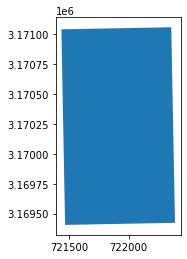

In [5]:
region_box.plot()

In [7]:
ndvi, ndviarray =landsat_indices_obj.read_data_asarray(f'data/output/{REGION}/20190521_{REGION}_ndvi.tif')

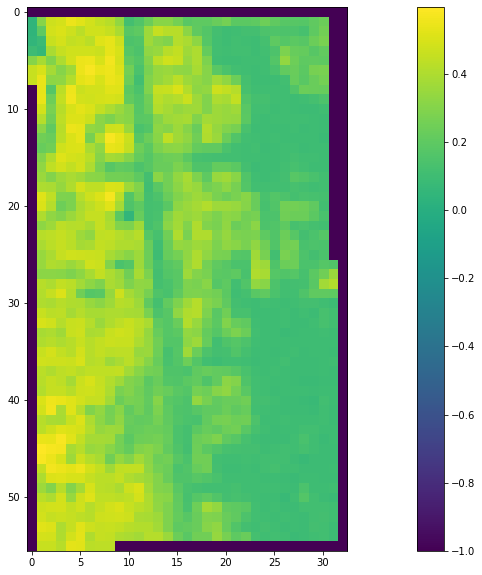

In [10]:
%matplotlib inline
plt.figure(figsize = (25,10))
plt.imshow(ndviarray)
plt.plot()
plt.colorbar()

In [19]:
mndwi, mndwiarray =landsat_indices_obj.read_data_asarray(f'data/output/{REGION}/20190521_{REGION}_mndwi.tif')

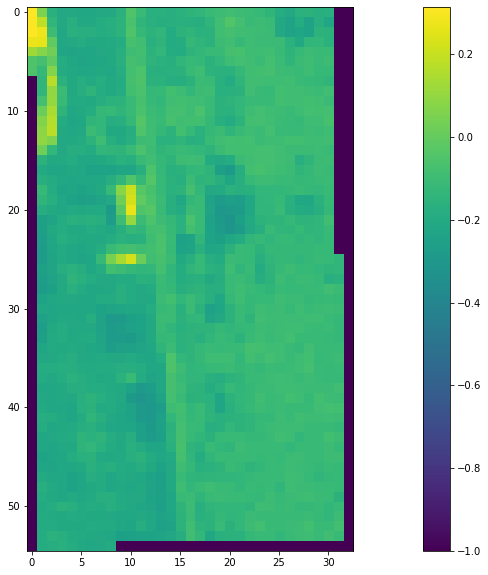

In [20]:
%matplotlib inline
plt.figure(figsize = (25,10))
plt.imshow(mndwiarray[1:])
plt.plot()
plt.colorbar()

In [ ]:
###

Requirements.txt
initialize the classes

